# MIBI and IMC

In [6]:
library(spatstat)
library(dplyr)
#library(ggplot2)
#library(imager,quietly = True)
library(stringr)
#ulimit::memory_limit(6000)

Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.0-3

Loading required package: spatstat.random

spatstat.random 3.0-1

Loading required package: spatstat.explore

Loading required package: nlme

spatstat.explore 3.0-5

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.0-2

Loading required package: spatstat.linnet

spatstat.linnet 3.0-3


spatstat 3.0-2 
For an introduction to spatstat, type ‘beginner’ 



Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
#mydata <- read.csv("./data/20220420_JP-TMAs_IMC-TMAs_MIBI_CombinedCelltypes_all.csv")
mydata <- read.csv("./data/cells_in_20_microns_of_tumor.csv")

In [2]:
#df[, 12:18][df[, 12:18] == 0] <- NA
#simplify to tumor
mydata[,'leiden'][mydata[,'leidencelltype5'] == 'epithelial'] <- 'tumor'

In [3]:
# not cycIF
mydata <- mydata[!grepl("JP-TMA", mydata$X),]
head(mydata)
tail(mydata)

,X,X20,X21,Basal.t.,CD20.B.cell,CD209..imm.,CD3.T.cell,CD4.T.cell,CD44..str.,CD44..t.,⋯,Subtype_prolif,leiden_CD3,leiden_CD3_tum,lymphocyte,LC,Tumor_Island,Lymphocyte_Type,DAPI_X,DAPI_Y,slide_scene
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1_sceneAy12x5-258_cell173,0,0,0,0,0,1,0,0,0,⋯,ER+_low,CD3 T cell,CD3 T cell,1,Isolated,True,CD3 T cell_Isolated,424.4000,90.40000,1_Ay12x5-258
2,1_sceneAy12x5-258_cell185,0,0,0,0,0,1,0,0,0,⋯,ER+_low,CD3 T cell,CD3 T cell,1,Isolated,True,CD3 T cell_Isolated,422.6829,96.14634,1_Ay12x5-258
3,1_sceneAy12x5-258_cell300,0,0,0,0,0,2,0,0,0,⋯,ER+_low,CD3 T cell,CD3 T cell,2,Isolated,True,CD3 T cell_Isolated,448.8226,155.32258,1_Ay12x5-258
4,1_sceneAy12x5-258_cell303,0,0,0,0,0,2,0,0,0,⋯,ER+_low,CD3 T cell,CD3 T cell,2,Isolated,True,CD3 T cell_Isolated,439.8400,158.78667,1_Ay12x5-258
5,1_sceneAy12x5-258_cell310,0,0,0,0,0,2,0,0,0,⋯,ER+_low,CD3 T cell,CD3 T cell,2,Isolated,True,CD3 T cell_Isolated,447.0814,164.79070,1_Ay12x5-258
6,11_sceneBy6x3-357_cell90,0,0,0,0,0,1,0,0,0,⋯,ER+_low,CD3 T cell,CD3 T cell,1,Isolated,True,CD3 T cell_Isolated,214.2727,84.12121,11_By6x3-357


,X,X20,X21,Basal.t.,CD20.B.cell,CD209..imm.,CD3.T.cell,CD4.T.cell,CD44..str.,CD44..t.,⋯,Subtype_prolif,leiden_CD3,leiden_CD3_tum,lymphocyte,LC,Tumor_Island,Lymphocyte_Type,DAPI_X,DAPI_Y,slide_scene
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
58329,27_scene1_cell2044,0,0,0,0,0,1,0,0,0,⋯,TNBC_low,CD3 T cell,CD3 T cell,1,Isolated,True,CD3 T cell_Isolated,436.7753,426.1404,27_scene1
58330,27_scene1_cell2436,0,0,0,0,0,2,2,0,0,⋯,TNBC_low,CD3 T cell,CD3 T cell,2,Isolated,True,CD3 T cell_Isolated,412.3908,504.7625,27_scene1
58331,27_scene1_cell2458,0,0,0,0,0,2,2,0,0,⋯,TNBC_low,CD3 T cell,CD3 T cell,2,Isolated,True,CD3 T cell_Isolated,414.5241,509.0647,27_scene1
58332,27_scene1_cell2478,0,0,0,0,0,2,2,0,0,⋯,TNBC_low,CD3 T cell,CD3 T cell,2,Isolated,True,CD3 T cell_Isolated,412.7806,512.8959,27_scene1
58333,27_scene1_cell2501,0,0,0,0,0,1,1,0,0,⋯,TNBC_low,CD3 T cell,CD3 T cell,1,Isolated,True,CD3 T cell_Isolated,479.1417,518.9233,27_scene1
58334,27_scene1_cell2530,0,0,0,0,0,1,1,0,0,⋯,TNBC_low,CD3 T cell,CD3 T cell,1,Isolated,True,CD3 T cell_Isolated,477.4534,524.0016,27_scene1


## start here

4/19/2023

In [ ]:
#### all the measures
ls_scene = unique(mydata$slide_scene)
ls_cells = unique(mydata$leiden) #c('T cell','B cell')#,'tumor','Endothelial','CD68+ immune','fibroblast','CD45 low immune'
ls_from = unique(mydata$leiden) #c('T cell','B cell','tumor')#
#ls_cells = c('tumor','Quies. str.','Vim+ FB','Macrophage','endothelial','CD3 T cell')#,'CD4 T cell','CD8 T cell''FN+ FB',
#ls_from = c('tumor','CD3 T cell') #,'CD4 T cell','CD8 T cell'
combined_df_Kcross <- data.frame(r=double(),
                    theo=double(),
                    iso=double(),
                    slide_scene=character(),
                    cell=character())
combined_df_Kest <- data.frame(r=double(),
                    theo=double(),
                    iso=double(),
                    slide_scene=character(),
                    cell=character())
combined_df_density <- data.frame(d=double(),
                    slide_scene=character(),
                    cell=character())

combined_df_Gcross <- data.frame(d=double(),
                    slide_scene=character(),
                    cell=character())

# loop version 1
datalist = list()
for (s_scene in ls_scene) { #ls_scene[1:18]
  print(s_scene)
  s_scene_scene = str_replace(s_scene, '_', '_scene')
  s_scene_scene = str_replace(s_scene_scene, '_scenescene', '_scene')
  print(s_scene_scene)
  mydataSubset <- mydata[grep(s_scene_scene, mydata$X), c('X','DAPI_X','DAPI_Y','leiden')]
  mymin <- mydataSubset %>% summarise_if(is.numeric, min)
  mymax <- mydataSubset %>% summarise_if(is.numeric, max)
  mypattern <- ppp(mydataSubset[,"DAPI_X"],mydataSubset[,"DAPI_Y"],c(mymin %>% pull('DAPI_X'),mymax %>% pull('DAPI_X')),
                c(mymin %>% pull('DAPI_Y'),mymax %>% pull('DAPI_Y')))
  win_p <- mypattern$window
  marks(mypattern) <- factor(mydataSubset$leiden)
  startTime <- Sys.time()
  for (s_cell in intersect((unique(mydataSubset$leiden)),ls_cells)) {
      print(s_cell)
      for (s_center in intersect((unique(mydataSubset$leiden)),ls_from)) {
          print(s_center)
          if (s_cell!=s_center){
              print(s_cell)
              print(s_center)
              # kcross
              Kcross_cell <- Kcross(X=mypattern, from=s_center, to=s_cell,correction='isotropic',rmax=100,nlarge=3000)
              Kcross_cell['slide_scene'] = s_scene
              Kcross_cell['from_cell'] = s_center
              Kcross_cell['to_cell'] = s_cell
              combined_df_Kcross <- rbind(combined_df_Kcross, Kcross_cell)
              #g cross
              Gcross_cell <- Gcross(X=mypattern, i=s_center, j=s_cell, correction=c("rs", "km", "han"))
              Gcross_cell['slide_scene'] = s_scene
              Gcross_cell['from_cell'] = s_center
              Gcross_cell['to_cell'] = s_cell
              combined_df_Gcross <- rbind(combined_df_Gcross, Gcross_cell)
              }
          else {
            mydata_cell = mydataSubset[grep(s_cell, mydataSubset$leiden), ]
            mypatternK <- ppp(x=(mydata_cell[,"DAPI_X"]),y=((mydata_cell[,"DAPI_Y"])),window=win_p)
            Kest_cell <- Kest(mypatternK,correction = 'isotropic',rmax=100,nlarge=3000)
            if (s_cell=='tumor') {
                K <- Kest(mypatternK, correction="isotropic",rmax=100,nlarge=3000)
                }
              #fit <- ppm(mypatternK, ~ polynom(x,y,2), Poisson())
            #lambda <- predict(fit, locations=mypatternK, type="trend")
            #Kest_cell <- Kinhom(mypatternK,lambda,correction = 'isotropic',rmax=100/.325,nlarge=4000) #inhom
            Kest_cell['slide_scene'] = s_scene
            Kest_cell['cell'] = s_cell
            combined_df_Kest <- rbind(combined_df_Kest, Kest_cell)
            D <- intensity(mypatternK)
            combined_df_density[nrow(combined_df_density) + 1,] <- list(D, s_scene, s_cell)
             }
          }
      
  }
  endTime <- Sys.time()
  print(endTime - startTime)
  break
    }


In [6]:
# pdf("plot1_kest.pdf")
# plot.fv(K)
# dev.off()

In [7]:
# pdf("plot1_quadrat.pdf")
# Q <- quadratcount(mypattern, nx= 4, ny=4)
# plot(mypattern)
# plot(Q,add=TRUE) 
# dev.off()

In [8]:
# #save out
# s_num = 'ROI'#'inhom' #first
# write.csv(combined_df_Kcross,sprintf("./data/IMC-MIBI_%s_Kcross.csv",s_num), row.names = FALSE)
# write.csv(combined_df_Kest,sprintf("./data/IMC-MIBI_%s_Kest.csv",s_num), row.names = FALSE)
# write.csv(combined_df_density,sprintf("./data/IMC-MIBI_%s_density.csv",s_num), row.names = FALSE)
# write.csv(combined_df_Gcross,sprintf("./data/IMC-MIBI_%s_Gcross.csv",s_num), row.names = FALSE)

## Occupancy

In [4]:
makeQuadrats <- function(p, squareLength) {
  require(spatstat)
  
  dx <- Window(p)$xrange[2] - Window(p)$xrange[1]
  dy <- Window(p)$yrange[2] - Window(p)$yrange[1]
  
  nx <- floor(dx/squareLength)
  ny <- floor(dy/squareLength)
  return(c(nx,ny))
 }

In [12]:
#### occupancy counts
ls_scene = unique(mydata$slide_scene)
mydata[,'leiden2'] = sub("$","_",mydata$leiden) #leiden

# loop 
pList = list()
for (s_scene in ls_scene) { #ls_scene[1:18]
  combined_df_occ <- data.frame(unlist.result_table.=double(),square_len=double(),
                    slide_scene=character())
  #s_scene = "123_sceneX8Y6-325" # error
  if (file.exists(sprintf("./data/OccLeiden/IMC-MIBI_%s_Occ_range.csv",s_scene))){ 
          print('exists skipping')
          next }  
  print(s_scene)
  s_scene_scene = str_replace(s_scene, '_', '_scene')
  s_scene_scene = str_replace(s_scene_scene, '_scenescene', '_scene')
  print(s_scene_scene)
  mydataSubset <- mydata[grep(s_scene_scene, mydata$X), c('X','DAPI_X','DAPI_Y','leiden2')]
  mymin <- mydataSubset %>% summarise_if(is.numeric, min)
  mymax <- mydataSubset %>% summarise_if(is.numeric, max)
  mypattern <- ppp(mydataSubset[,"DAPI_X"],mydataSubset[,"DAPI_Y"],c(mymin %>% pull('DAPI_X'),mymax %>% pull('DAPI_X')),
                c(mymin %>% pull('DAPI_Y'),mymax %>% pull('DAPI_Y')))
  win_p <- mypattern$window
  marks(mypattern) <- factor(mydataSubset$leiden2)
  for (i in 1: 30) {
      nxny <- makeQuadrats(mypattern,i*10)
      skip_to_next <- FALSE
      tryCatch({
        result_table <- quadratcount.splitppp(split(mypattern), nx=nxny[1], ny=nxny[2])
        counts <- data.frame(unlist(result_table))
          }, error = function(e) { skip_to_next <<- TRUE})
      if(skip_to_next) { 
          print('error. skipping')
          next }  
      if (length(counts) > 0) {
        counts['square_len'] = i*10
        counts['slide_scene'] = s_scene
        combined_df_occ <- rbind(combined_df_occ, counts)
        }
      #break
    }
  # #save out
  write.csv(combined_df_occ,sprintf("./data/OccLeiden/IMC-MIBI_%s_Occ_range.csv",s_scene), row.names = TRUE)
  #break
  }


#s_num = 'ROI'#'inhom' #first
print('done')

[1] "exists skipping"
[1] "exists skipping"
[1] "12_Ay13x7-324"
[1] "12_sceneAy13x7-324"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "12_Ay13x8-332"
[1] "12_sceneAy13x8-332"
[1] "13_Cy9x2-39"
[1] "13_sceneCy9x2-39"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error. skipping"
[1] "error.

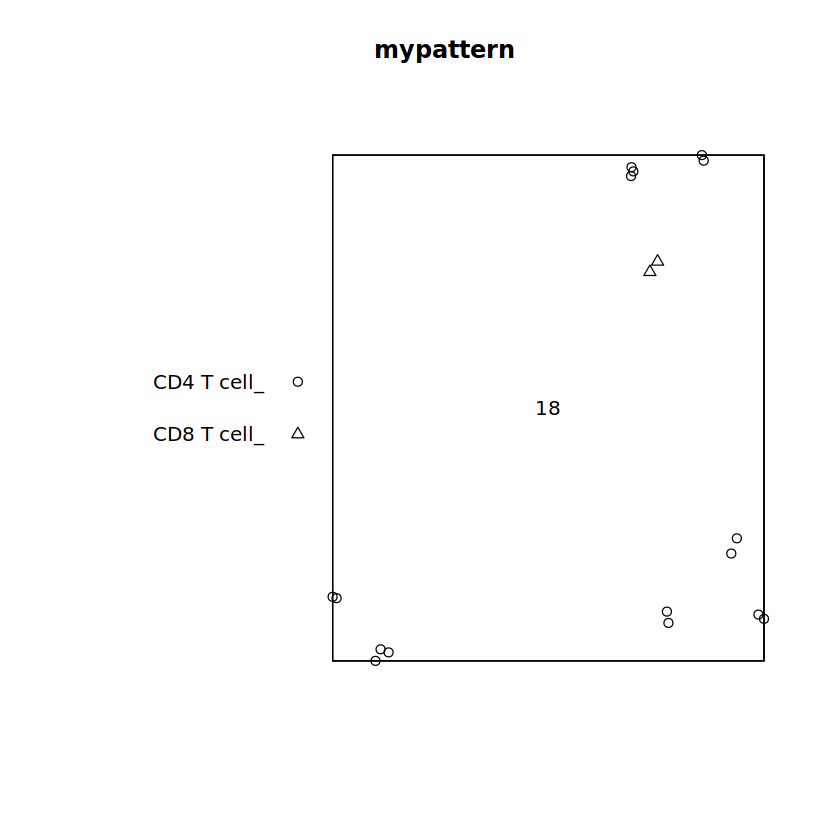

In [13]:
plot(mypattern)
Q <- quadratcount(mypattern, nx=nxny[1], ny=nxny[2])
plot(Q,add=TRUE) 

In [18]:
'done'

[1] "done"